# CMPS-3160 Final Project: How trends are changed on Steam? 
### Author: Bo Zhang, Tian Xie

https://dekuwang.github.io/

#### Background Information: 
Tian Xie and Bo Zhang are both loyal Steam users, so we wanted to analyze how various games have evolved over time and how players' preferences have changed. We have currently selected a database of Steam games in Data World as of 2017, a dataset that contains information on all of Steam's current games. This dataset includes the game release date, game type, site name, developer, and a number of recommendations. Many of these data have no significant impact on the goal of our analysis. Therefore, we chose to narrow down the type of data to the game release date, game type, and whether it supports multiplayer. We believe that these data have a direct or indirect impact on the popularity of the game. In addition to this although the game genre is the same, there have been innovations in gameplay. This factor also affects the popularity of the type of game. Therefore, if there is a significant change in the popularity of a certain genre, we will also explain the change in popularity in relation to the change in the genre in that year.

In [57]:
import pandas as pd
import numpy

sg_df = pd.read_csv("Steam Data/steam_games.csv")
sg_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


Here is a Data set which record all games in Steam until 2020, and our target is to see what's the trend on steam each year, like the average price, type of game, and so on. 

#### Let's see what information are included in the dataset.

In [58]:
sg_df.keys()
#By using keys, we can see the index in the dataframe easier

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [59]:
sg_df["all_reviews"]

0        Very Positive,(42,550),- 92% of the 42,550 use...
1        Mixed,(836,608),- 49% of the 836,608 user revi...
2        Mostly Positive,(7,030),- 71% of the 7,030 use...
3        Mixed,(167,115),- 61% of the 167,115 user revi...
4        Mostly Positive,(11,481),- 74% of the 11,481 u...
                               ...                        
40828                                                  NaN
40829                                                  NaN
40830                                                  NaN
40831                                                  NaN
40832                                                  NaN
Name: all_reviews, Length: 40833, dtype: object

In [60]:
reviews_list = []
for i in sg_df["all_reviews"]:
    temp = str(i).split(",")
    reviews_list.append(temp[0])
sg_df["Reviews"] = reviews_list

sg_df[["Reviews"]]

,Reviews
0,Very Positive
1,Mixed
2,Mostly Positive
3,Mixed
4,Mostly Positive
...,...
40828,nan
40829,nan
40830,nan
40831,nan


#### The release dates of the games.

In [61]:
sg_df["release_date"]

0        May 12, 2016
1        Dec 21, 2017
2        Apr 24, 2018
3        Dec 13, 2018
4         May 6, 2003
             ...     
40828    Feb 12, 2019
40829     Feb 5, 2019
40830    Jul 31, 2018
40831    Jul 24, 2018
40832     Aug 8, 2018
Name: release_date, Length: 40833, dtype: object

#### The data in the release_date include confusing information. So we need to use the filter to get useful information.

In [62]:
result_list = []

Accept_Year = []
for i in range(100):
    Accept_Year.append(str(2020-i))

for i in sg_df["release_date"]:
    
    temp_list = str(i).split()[-1]
    if temp_list in Accept_Year:
        result_list.append(temp_list)
    else:
        result_list.append(0)

    
sg_df["ReleaseYear"] = result_list
sg_df["ReleaseYear"].astype(int)

0        2016
1        2017
2        2018
3        2018
4        2003
         ... 
40828    2019
40829    2019
40830    2018
40831    2018
40832    2018
Name: ReleaseYear, Length: 40833, dtype: int32

####

#### It can be clearly seen that the number of games has seen an exponential growth in recent years.

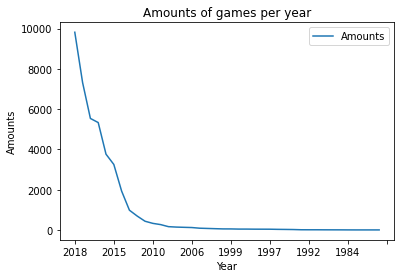

In [63]:

graph_year_amount = sg_df["ReleaseYear"].sort_index().value_counts().plot()
graph_year_amount.set_xlabel("Year")
graph_year_amount.set_ylabel("Amounts")
graph_year_amount.set_title("Amounts of games per year")
graph_year_amount.legend(["Amounts"])

#From this graph, it's easy to see that there are more and more new games are published on Steam

In [64]:
sg_df[["genre"]]

,genre
0,Action
1,"Action,Adventure,Massively Multiplayer"
2,"Action,Adventure,Strategy"
3,"Action,Adventure,Massively Multiplayer"
4,"Action,Free to Play,Massively Multiplayer,RPG,..."
...,...
40828,"Casual,Simulation"
40829,"Casual,Simulation"
40830,"Indie,RPG,Strategy"
40831,Action


In [65]:
temp = sg_df["genre"].str.split(",", expand=True)
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Action,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Massively Multiplayer,None,None,None,None,None,None,None,None,None,None,None
2,Action,Adventure,Strategy,None,None,None,None,None,None,None,None,None,None,None
3,Action,Adventure,Massively Multiplayer,None,None,None,None,None,None,None,None,None,None,None
4,Action,Free to Play,Massively Multiplayer,RPG,Strategy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,Casual,Simulation,None,None,None,None,None,None,None,None,None,None,None,None
40829,Casual,Simulation,None,None,None,None,None,None,None,None,None,None,None,None
40830,Indie,RPG,Strategy,None,None,None,None,None,None,None,None,None,None,None
40831,Action,None,None,None,None,None,None,None,None,None,None,None,None,None


#### We distinguish the game types by adding a boolean to the for loop.

In [66]:
sg_df["genre"]


0                                                   Action
1                   Action,Adventure,Massively Multiplayer
2                                Action,Adventure,Strategy
3                   Action,Adventure,Massively Multiplayer
4        Action,Free to Play,Massively Multiplayer,RPG,...
                               ...                        
40828                                    Casual,Simulation
40829                                    Casual,Simulation
40830                                   Indie,RPG,Strategy
40831                                               Action
40832                                        Adventure,RPG
Name: genre, Length: 40833, dtype: object

In [67]:
Action_list = []
Adventrue_list = []
Massively_list = []
Free_to_Play_list = []
Strategy_list = []
Early_Access_list = []
RPG_list = []
Simulation_list = []
Racing_list = []
Casual_list = []




for i in sg_df["genre"]:
    temp = str(i).split(",")
    if "Action" in temp:
        Action_list.append(True)
    else:
        Action_list.append(False)

    if "Adventure" in temp:
        Adventrue_list.append(True)
    else:
        Adventrue_list.append(False) 
        
    if "Massively Multiplayer" in temp:
        Massively_list.append(True)
    else:
        Massively_list.append(False)   
    
    if "Free to Play" in temp:
        Free_to_Play_list.append(True)
    else:
        Free_to_Play_list.append(False)   
    
    if "Strategy" in temp:
        Strategy_list.append(True)
    else:
        Strategy_list.append(False)
    
    if "Early Access" in temp:
        Early_Access_list.append(True)
    else:
        Early_Access_list.append(False)

    if "RPG" in temp:
        RPG_list.append(True)
    else:
        RPG_list.append(False)

    if "Simulation" in temp:
        Simulation_list.append(True)
    else:
        Simulation_list.append(False)

    if "Racing" in temp:
        Racing_list.append(True)
    else:
        Racing_list.append(False)

    if "Casual" in temp:
        Casual_list.append(True)
    else:
        Casual_list.append(False)

sg_df["isAction"] = Action_list
sg_df["isAdventure"] = Adventrue_list
sg_df["isMassively_Online"] = Massively_list
sg_df["isFreeToPlay"] = Free_to_Play_list
sg_df["isStrategy"] = Strategy_list
sg_df["isEarlyAccess"] = Early_Access_list
sg_df["isRPG"] = RPG_list
sg_df["isSimulation"] = Simulation_list
sg_df["Racing"] = Racing_list
sg_df["Casual"] = Casual_list

sg_df



,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,isAction,isAdventure,isMassively_Online,isFreeToPlay,isStrategy,isEarlyAccess,isRPG,isSimulation,Racing,Casual
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,True,False,False,False,False,False,False,False,False,False
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,True,True,True,False,False,False,False,False,False,False
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,True,True,False,False,True,False,False,False,False,False
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",...,True,True,True,False,False,False,False,False,False,False
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",...,True,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation",...,False,False,False,False,False,False,False,True,False,True
40829,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation",...,False,False,False,False,False,False,False,True,False,True
40830,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...",...,False,False,False,False,True,False,True,False,False,False
40831,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,...,True,False,False,False,False,False,False,False,False,False


C:\Users\ASUS\AppData\Local\Temp/ipykernel_30452/3320077455.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sg_df[["ReleaseYear","isAction", "isAdventure",


<AxesSubplot:>

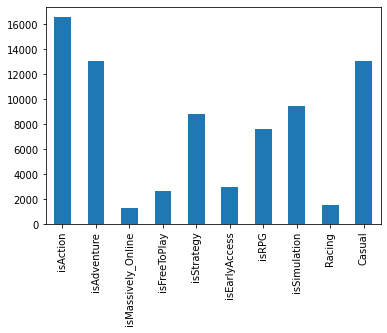

In [68]:
sg_df[["ReleaseYear","isAction", "isAdventure", 
"isMassively_Online", "isFreeToPlay", 
"isStrategy", "isEarlyAccess", "isRPG", 
"isSimulation", "Racing", "Casual"]].sum().plot.bar()

#This step visualized the amount of games by their genres


#### We split the game type of each game from the original dataframe.